# U.S Airline flights and cancellations: January - June 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Data sources

dataset source: https://www.kaggle.com/datasets/akulbahl/covid19-airline-flight-delays-and-cancellations

original source: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FMF&QO_fu146_anzr=Nv4+Pn44vr45

### Note

Please be advised that, due to the dimensionality of the data, some parts of the code may take even 1 hour until completed. 

Some code parts such as cross-validation of the models, can be marked down if needed as screenshots with outcomes have been provided. These codes will have **(CTM)** in a comment header.


### Metadata: features used for the analysis

Features that have been chosen for making classification below have a direct impact on the flights. The main point is to predict if the flight will be cancelled or not based on the seasonality (date) and destination rather than the carrier provider. Test including carrier provider was also performed, however, there were no changes in model accuracy therefore was not included. 

| Variable             | Description |
|----------------------|-------------|
| QUARTER              | 1: Jan-Mar, 2: Apr-Jun, 3: Jul-Sep, 4: Oct-Dec |
| MONTH                | Month of Year |
| DAY_OF_MONTH         | Date of Month |
| DAY_OF_WEEK          | Day of Week (1: Monday, 7: Sunday) |
| ORIGIN_CITY_NAME     | Flight Departure City, State Names |
| ORIGIN_STATE_ABR     | Flight Departure 2-Letter State Abbreviation |
| ORIGIN_STATE_NM      | Flight Departure State Name |
| DEST                 | Flight Arrival 3-Letter Airport Abbreviation |
| DEST_CITY_NAME       | Flight Arrival City, State Names |
| DEST_STATE_ABR       | Flight Arrival 2-Letter State Abbreviation |
| DEST_STATE_NM        | Flight Arrival State Name |
| CRS_DEP_TIME         | Scheduled Departure Time (HHMM) |
| CRS_ARR_TIME         | Scheduled Arrival Time (HHMM) |
| CANCELLED            | Flight Cancelled (0: No, 1: Yes) |
| DISTANCE             | Distance (Miles) |
| DISTANCE_GROUP       | Distance in 250-Mile increments |



#### Data upload and overview 

Pandas library has been used to load dataset.

In [2]:
file_path = r'C:\Users\Admin\Desktop\CCT\ML sem 1\CA1\jantojun2020.csv'
df = pd.read_csv(file_path)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1,1,3,1/1/2020,WN,5888,N951WN,ONT,"Ontario, CA",CA,California,SFO,"San Francisco, CA",CA,California,1810,1851.0,41.0,41.0,1.0,2.0,1800-1859,44.0,1935.0,2049.0,4.0,1945,2053.0,68.0,68.0,1.0,4.0,1900-1959,0,NaN,95.0,122.0,74.0,363,2,8.0,0.0,27.0,0.0,33.0
1,2020,1,1,1,3,1/1/2020,WN,6276,N467WN,ONT,"Ontario, CA",CA,California,SFO,"San Francisco, CA",CA,California,1150,1146.0,-4.0,0.0,0.0,-1.0,1100-1159,13.0,1159.0,1310.0,8.0,1320,1318.0,-2.0,0.0,0.0,-1.0,1300-1359,0,NaN,90.0,92.0,71.0,363,2,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,1/1/2020,WN,4598,N7885A,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,2020,2016.0,-4.0,0.0,0.0,-1.0,2000-2059,8.0,2024.0,2121.0,3.0,2130,2124.0,-6.0,0.0,0.0,-1.0,2100-2159,0,NaN,70.0,68.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,1/1/2020,WN,4761,N551WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,1340,1350.0,10.0,10.0,0.0,0.0,1300-1359,10.0,1400.0,1503.0,2.0,1455,1505.0,10.0,10.0,0.0,0.0,1400-1459,0,NaN,75.0,75.0,63.0,333,2,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,1/1/2020,WN,5162,N968WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,915,916.0,1.0,1.0,0.0,0.0,0900-0959,6.0,922.0,1019.0,4.0,1035,1023.0,-12.0,0.0,0.0,-1.0,1000-1059,0,NaN,80.0,67.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_columns', 20)

#### Basic overview of target variable  

By using a unique function on the “cancelled” feature, shows all unique values. Value_counts with using the normalize parameter show percentage proportions of the values. Seems like the target variable is imbalanced.

In [6]:
df["CANCELLED"].unique()

array([0, 1], dtype=int64)

In [7]:
df["CANCELLED"].value_counts(normalize=True) # proportions in percentage

0    0.896962
1    0.103038
Name: CANCELLED, dtype: float64

#### Null values overview 

Null values need to be explored and removed as machine learning models won’t otherwise.

In [8]:
# Features where 10% or more contain null values will be removed

df.isnull().sum()

YEAR                         0
QUARTER                      0
MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
FL_DATE                      0
MKT_UNIQUE_CARRIER           0
MKT_CARRIER_FL_NUM           0
TAIL_NUM                162927
ORIGIN                       0
ORIGIN_CITY_NAME             0
ORIGIN_STATE_ABR             0
ORIGIN_STATE_NM              0
DEST                         0
DEST_CITY_NAME               0
DEST_STATE_ABR               0
DEST_STATE_NM                0
CRS_DEP_TIME                 0
DEP_TIME                281937
DEP_DELAY               281992
DEP_DELAY_NEW           281992
DEP_DEL15               281992
DEP_DELAY_GROUP         281992
DEP_TIME_BLK                 0
TAXI_OUT                282493
WHEELS_OFF              282493
WHEELS_ON               283554
TAXI_IN                 283554
CRS_ARR_TIME                 0
ARR_TIME                283554
ARR_DELAY               287334
ARR_DELAY_NEW           287334
ARR_DEL1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745847 entries, 0 to 2745846
Data columns (total 47 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   QUARTER              int64  
 2   MONTH                int64  
 3   DAY_OF_MONTH         int64  
 4   DAY_OF_WEEK          int64  
 5   FL_DATE              object 
 6   MKT_UNIQUE_CARRIER   object 
 7   MKT_CARRIER_FL_NUM   int64  
 8   TAIL_NUM             object 
 9   ORIGIN               object 
 10  ORIGIN_CITY_NAME     object 
 11  ORIGIN_STATE_ABR     object 
 12  ORIGIN_STATE_NM      object 
 13  DEST                 object 
 14  DEST_CITY_NAME       object 
 15  DEST_STATE_ABR       object 
 16  DEST_STATE_NM        object 
 17  CRS_DEP_TIME         int64  
 18  DEP_TIME             float64
 19  DEP_DELAY            float64
 20  DEP_DELAY_NEW        float64
 21  DEP_DEL15            float64
 22  DEP_DELAY_GROUP      float64
 23  DEP_TIME_BLK         object 
 24

#### Features with over 10% of missing/null values deletion 

To avoid bias, features which contain more than 10% of missing values will be removed.

In [10]:
df = df.dropna(axis=1)

In [11]:
df.isnull().sum()

YEAR                  0
QUARTER               0
MONTH                 0
DAY_OF_MONTH          0
DAY_OF_WEEK           0
FL_DATE               0
MKT_UNIQUE_CARRIER    0
MKT_CARRIER_FL_NUM    0
ORIGIN                0
ORIGIN_CITY_NAME      0
ORIGIN_STATE_ABR      0
ORIGIN_STATE_NM       0
DEST                  0
DEST_CITY_NAME        0
DEST_STATE_ABR        0
DEST_STATE_NM         0
CRS_DEP_TIME          0
DEP_TIME_BLK          0
CRS_ARR_TIME          0
ARR_TIME_BLK          0
CANCELLED             0
DISTANCE              0
DISTANCE_GROUP        0
dtype: int64

In [12]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CANCELLED,DISTANCE,DISTANCE_GROUP
0,2020,1,1,1,3,1/1/2020,WN,5888,ONT,"Ontario, CA",...,"San Francisco, CA",CA,California,1810,1800-1859,1945,1900-1959,0,363,2
1,2020,1,1,1,3,1/1/2020,WN,6276,ONT,"Ontario, CA",...,"San Francisco, CA",CA,California,1150,1100-1159,1320,1300-1359,0,363,2
2,2020,1,1,1,3,1/1/2020,WN,4598,ONT,"Ontario, CA",...,"San Jose, CA",CA,California,2020,2000-2059,2130,2100-2159,0,333,2
3,2020,1,1,1,3,1/1/2020,WN,4761,ONT,"Ontario, CA",...,"San Jose, CA",CA,California,1340,1300-1359,1455,1400-1459,0,333,2
4,2020,1,1,1,3,1/1/2020,WN,5162,ONT,"Ontario, CA",...,"San Jose, CA",CA,California,915,0900-0959,1035,1000-1059,0,333,2


#### Irrelevant columns drop

Irrelevant columns to the flights. As the prediction is about predicting if a flight was either cancelled or not, based on destination and seasonality (date) rather than carrier, it has also been removed.

In [13]:
droplist = ["YEAR","MKT_CARRIER_FL_NUM","DEP_TIME_BLK","ARR_TIME_BLK",
         "DISTANCE_GROUP","FL_DATE","ORIGIN","MKT_UNIQUE_CARRIER","ORIGIN_STATE_ABR","DEST",]

In [14]:
df = df.drop(droplist, axis=1)

In [15]:
df.shape

(2745847, 13)

In [16]:
df

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DISTANCE
0,1,1,1,3,"Ontario, CA",California,"San Francisco, CA",CA,California,1810,1945,0,363
1,1,1,1,3,"Ontario, CA",California,"San Francisco, CA",CA,California,1150,1320,0,363
2,1,1,1,3,"Ontario, CA",California,"San Jose, CA",CA,California,2020,2130,0,333
3,1,1,1,3,"Ontario, CA",California,"San Jose, CA",CA,California,1340,1455,0,333
4,1,1,1,3,"Ontario, CA",California,"San Jose, CA",CA,California,915,1035,0,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745842,2,6,13,6,"Seattle, WA",Washington,"Honolulu, HI",HI,Hawaii,1050,1405,0,2677
2745843,2,6,13,6,"Phoenix, AZ",Arizona,"Seattle, WA",WA,Washington,1530,1826,0,1107
2745844,2,6,13,6,"Seattle, WA",Washington,"Phoenix, AZ",AZ,Arizona,1100,1405,0,1107
2745845,2,6,13,6,"Santa Ana, CA",California,"Seattle, WA",WA,Washington,1510,1755,0,978


#### Features used for further analysis.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745847 entries, 0 to 2745846
Data columns (total 13 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   QUARTER           int64 
 1   MONTH             int64 
 2   DAY_OF_MONTH      int64 
 3   DAY_OF_WEEK       int64 
 4   ORIGIN_CITY_NAME  object
 5   ORIGIN_STATE_NM   object
 6   DEST_CITY_NAME    object
 7   DEST_STATE_ABR    object
 8   DEST_STATE_NM     object
 9   CRS_DEP_TIME      int64 
 10  CRS_ARR_TIME      int64 
 11  CANCELLED         int64 
 12  DISTANCE          int64 
dtypes: int64(8), object(5)
memory usage: 272.3+ MB


In [18]:
df.shape

(2745847, 13)

#### Split of the city name and short abbreviation.

In [19]:
df["ORIGIN_CITY_NAME"]

0            Ontario, CA
1            Ontario, CA
2            Ontario, CA
3            Ontario, CA
4            Ontario, CA
               ...      
2745842      Seattle, WA
2745843      Phoenix, AZ
2745844      Seattle, WA
2745845    Santa Ana, CA
2745846     Honolulu, HI
Name: ORIGIN_CITY_NAME, Length: 2745847, dtype: object

In [20]:
# removing origin code and keeping first string - origin/city name
df["ORIGIN_CITY_NAME"] = df["ORIGIN_CITY_NAME"].str.split(",",).str[0]
df["DEST_CITY_NAME"] = df["DEST_CITY_NAME"].str.split(",").str[0]

In [21]:
df.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DISTANCE
0,1,1,1,3,Ontario,California,San Francisco,CA,California,1810,1945,0,363
1,1,1,1,3,Ontario,California,San Francisco,CA,California,1150,1320,0,363
2,1,1,1,3,Ontario,California,San Jose,CA,California,2020,2130,0,333
3,1,1,1,3,Ontario,California,San Jose,CA,California,1340,1455,0,333
4,1,1,1,3,Ontario,California,San Jose,CA,California,915,1035,0,333


In [22]:
df["ORIGIN_CITY_NAME"].unique()

array(['Ontario', 'Norfolk', 'West Palm Beach/Palm Beach', 'Portland',
       'Philadelphia', 'Phoenix', 'Pittsburgh', 'Pensacola', 'Providence',
       'Raleigh/Durham', 'Richmond', 'Reno', 'Rochester', 'Fort Myers',
       'San Diego', 'San Antonio', 'Louisville', 'Seattle',
       'San Francisco', 'San Jose', 'San Juan', 'Salt Lake City',
       'Sacramento', 'Santa Ana', 'St. Louis', 'Tampa', 'Tulsa', 'Tucson',
       'Albuquerque', 'Albany', 'Amarillo', 'Atlanta', 'Austin', 'Dallas',
       'New Orleans', 'Oakland', 'Kahului', 'Oklahoma City', 'Omaha',
       'Hartford', 'Birmingham', 'Nashville', 'Boise', 'Boston',
       'Buffalo', 'Burbank', 'Baltimore', 'Charleston', 'Cleveland',
       'Charlotte', 'Columbus', 'Corpus Christi', 'Cincinnati',
       'Washington', 'Denver', 'Des Moines', 'Detroit', 'Panama City',
       'El Paso', 'Fort Lauderdale', 'Spokane', 'Grand Rapids', 'Greer',
       'Honolulu', 'Houston', 'Harlingen/San Benito', 'Wichita',
       'Indianapolis', 'Islip

In [23]:
# number of unique ORIGIN_CITY_NAME values

len(df["ORIGIN_CITY_NAME"].unique())

359

#### Origin popularity

In [24]:
# most popular origin cities - Chicago, Atlanta, Dallas

In [25]:
pd.set_option('display.max_rows', None)
df["ORIGIN_CITY_NAME"].value_counts()

Chicago                           159609
Atlanta                           128166
Dallas/Fort Worth                 112065
Denver                            101678
Charlotte                          98762
New York                           83223
Houston                            80951
Washington                         77418
Los Angeles                        76547
Phoenix                            70030
Seattle                            64679
Las Vegas                          61057
Detroit                            57271
San Francisco                      53811
Orlando                            53318
Philadelphia                       50637
Minneapolis                        50270
Boston                             46888
Newark                             45706
Salt Lake City                     43777
Baltimore                          37718
Fort Lauderdale                    36714
San Diego                          33082
Miami                              32654
Portland        

In [26]:
pd.set_option('display.max_rows', 20)

##### Origin popularity bar plot

The plot below represents the graphical origin of city distribution (popularity) which destinations planes flight from the most frequently.

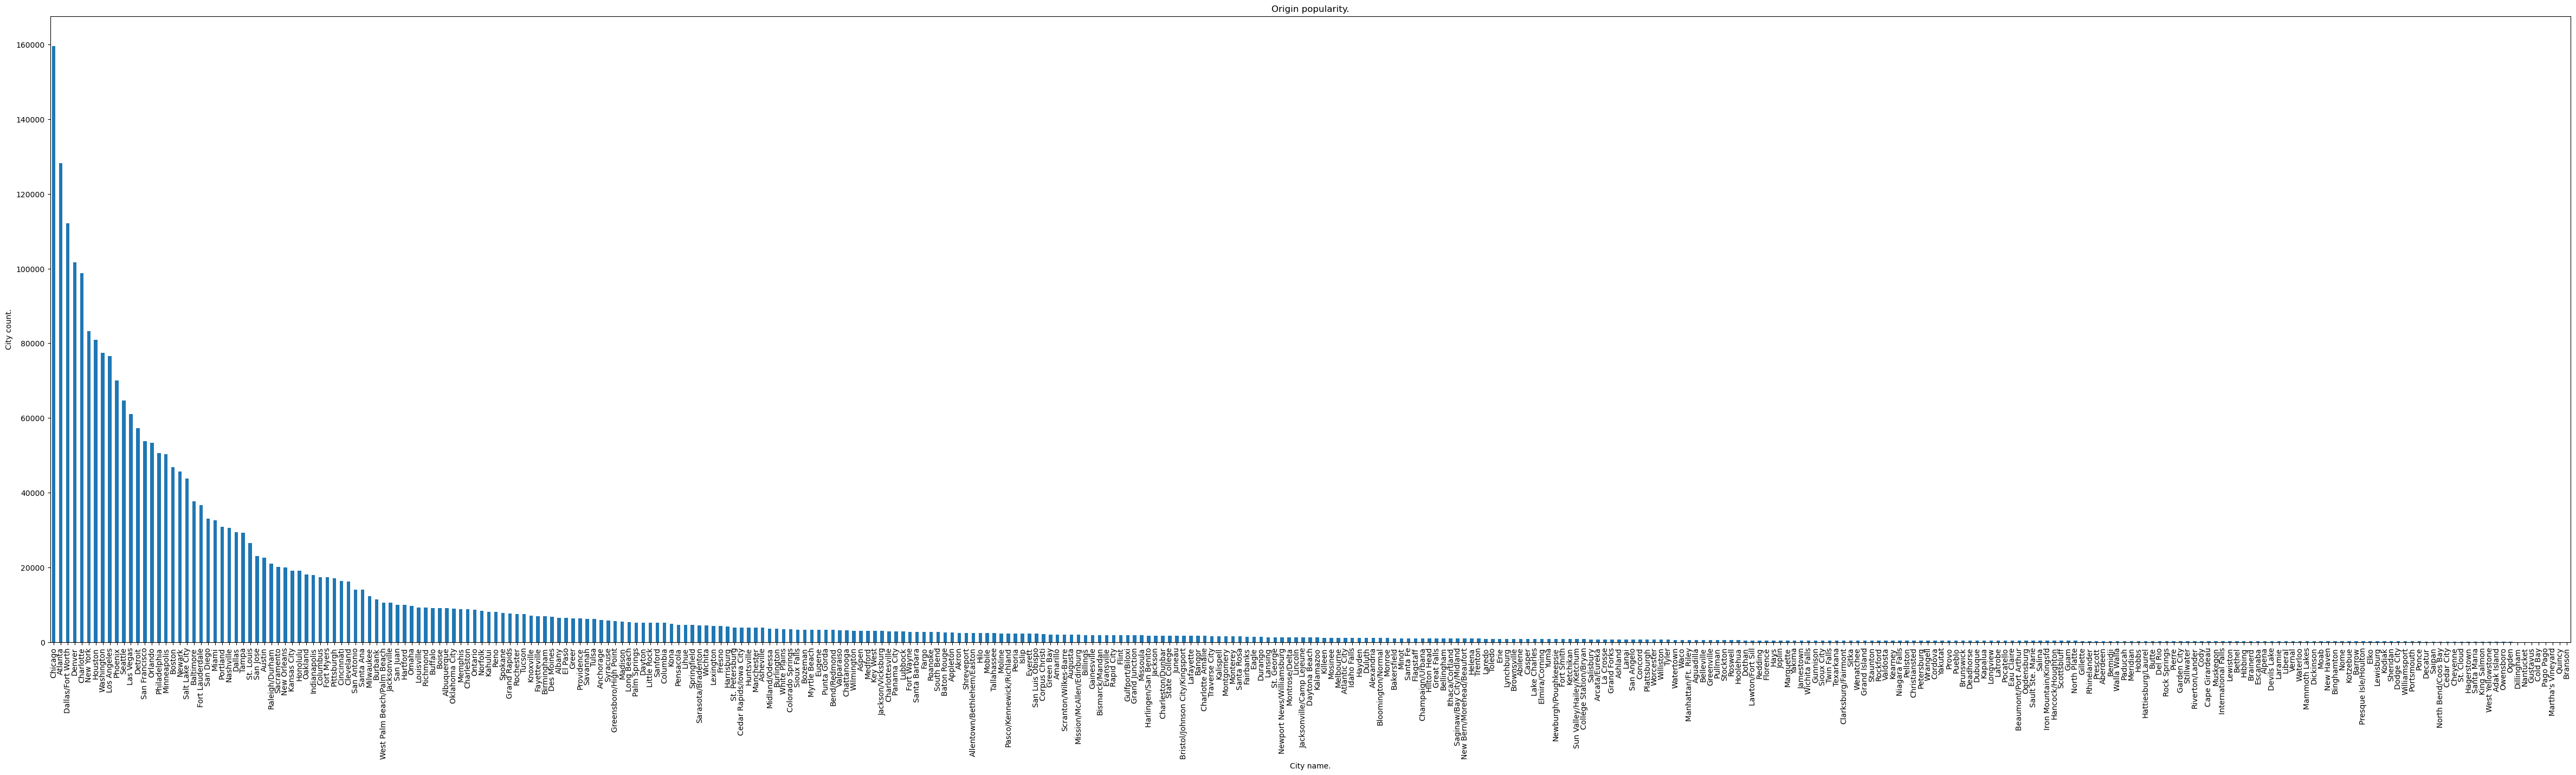

In [27]:
plt.figure(figsize=(60,15));
df["ORIGIN_CITY_NAME"].value_counts().plot(kind="bar");
plt.xlabel("City name.");
plt.ylabel("City count.");
plt.title("Origin popularity.");

#### Removing cities where the total count are less than 10.000 (not popular)

To avoid model train complexity, origin cities with a total count smaller than 10.000 will be removed.

In [28]:
origin_count = df["ORIGIN_CITY_NAME"].value_counts()
origin_count

Chicago              159609
Atlanta              128166
Dallas/Fort Worth    112065
Denver               101678
Charlotte             98762
                      ...  
Cold Bay                 26
Pago Pago                26
Martha's Vineyard        17
Quincy                   10
Branson                   9
Name: ORIGIN_CITY_NAME, Length: 359, dtype: int64

In [29]:
origin_morethan10k = origin_count[origin_count >= 10000].index

In [30]:
origin_morethan10k

Index(['Chicago', 'Atlanta', 'Dallas/Fort Worth', 'Denver', 'Charlotte',
       'New York', 'Houston', 'Washington', 'Los Angeles', 'Phoenix',
       'Seattle', 'Las Vegas', 'Detroit', 'San Francisco', 'Orlando',
       'Philadelphia', 'Minneapolis', 'Boston', 'Newark', 'Salt Lake City',
       'Baltimore', 'Fort Lauderdale', 'San Diego', 'Miami', 'Portland',
       'Nashville', 'Dallas', 'Tampa', 'St. Louis', 'San Jose', 'Austin',
       'Raleigh/Durham', 'Sacramento', 'New Orleans', 'Kansas City',
       'Honolulu', 'Oakland', 'Indianapolis', 'Columbus', 'Fort Myers',
       'Pittsburgh', 'Cincinnati', 'Cleveland', 'San Antonio', 'Santa Ana',
       'Milwaukee', 'Burbank', 'West Palm Beach/Palm Beach', 'Jacksonville'],
      dtype='object')

In [31]:
df = df[df["ORIGIN_CITY_NAME"].isin(origin_morethan10k)]

In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
# After removing cities of which the total count was smaller than 10.000, origin destinations have been reduced from 359 to 49.

In [34]:
len(df["ORIGIN_CITY_NAME"].unique())

49

In [35]:
df

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DISTANCE
0,1,1,1,3,West Palm Beach/Palm Beach,Florida,Atlanta,GA,Georgia,1300,1450,0,545
1,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,700,915,0,883
2,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,1750,2010,0,883
3,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,1100,1320,0,883
4,1,1,1,3,West Palm Beach/Palm Beach,Florida,Islip,NY,New York,755,1030,0,1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141130,2,6,13,6,Seattle,Washington,Honolulu,HI,Hawaii,1050,1405,0,2677
2141131,2,6,13,6,Phoenix,Arizona,Seattle,WA,Washington,1530,1826,0,1107
2141132,2,6,13,6,Seattle,Washington,Phoenix,AZ,Arizona,1100,1405,0,1107
2141133,2,6,13,6,Santa Ana,California,Seattle,WA,Washington,1510,1755,0,978


In [36]:
df["ORIGIN_STATE_NM"].unique()

array(['Florida', 'Oregon', 'Pennsylvania', 'Arizona', 'Maine',
       'North Carolina', 'California', 'Texas', 'Washington', 'Utah',
       'Missouri', 'Georgia', 'Louisiana', 'Tennessee', 'Massachusetts',
       'Maryland', 'Ohio', 'Kentucky', 'Virginia', 'Colorado', 'Michigan',
       'Hawaii', 'Indiana', 'Nevada', 'New York', 'Illinois', 'Wisconsin',
       'Minnesota', 'New Jersey', 'Mississippi'], dtype=object)

#### Destination cities - feature overview

In [37]:
df["DEST_CITY_NAME"].unique()

array(['Atlanta', 'Baltimore', 'Islip', 'Burbank', 'Dallas', 'Denver',
       'Las Vegas', 'Los Angeles', 'Chicago', 'Oakland', 'Ontario',
       'Phoenix', 'San Diego', 'San Jose', 'Sacramento', 'St. Louis',
       'Nashville', 'Fort Lauderdale', 'Houston', 'Orlando', 'Tampa',
       'Albuquerque', 'Austin', 'Boise', 'Buffalo', 'Cleveland',
       'Columbus', 'Detroit', 'El Paso', 'Spokane', 'Wichita',
       'Indianapolis', 'Little Rock', 'Kansas City', 'Milwaukee',
       'Minneapolis', 'New Orleans', 'Oklahoma City', 'Omaha', 'Portland',
       'Philadelphia', 'Pittsburgh', 'Raleigh/Durham', 'Reno',
       'San Antonio', 'Louisville', 'Seattle', 'San Francisco',
       'Salt Lake City', 'Santa Ana', 'Tulsa', 'Fort Myers', 'Hartford',
       'Tucson', 'Honolulu', 'Long Beach', 'Kahului', 'Boston',
       'Washington', 'Des Moines', 'New York', 'Albany', 'Birmingham',
       'Memphis', 'Manchester', 'Providence', 'San Juan', 'Greer',
       'Jacksonville', 'West Palm Beach/Palm Beach

In [38]:
# total number of unique destination cities before removing non popular cities

len(df["DEST_CITY_NAME"].unique())

340

#### Removing destination cities where the total count are less than 10.000 (not popular)

In [39]:
pd.set_option('display.max_rows', None)
df["DEST_CITY_NAME"].value_counts()

Chicago                           97236
Atlanta                           77281
New York                          68376
Los Angeles                       63919
Denver                            62695
Dallas/Fort Worth                 55832
Washington                        55067
Houston                           54073
Las Vegas                         50422
Phoenix                           50004
Charlotte                         47575
Boston                            43368
Orlando                           43235
Seattle                           42192
San Francisco                     42156
Detroit                           37953
Newark                            37240
Minneapolis                       33940
Philadelphia                      32338
Fort Lauderdale                   30571
Baltimore                         30284
San Diego                         30124
Salt Lake City                    28874
Nashville                         28583
Miami                             26546


In [40]:
pd.set_option('display.max_rows', 20)

In [41]:
origin_count = df["DEST_CITY_NAME"].value_counts()
origin_count

Chicago              97236
Atlanta              77281
New York             68376
Los Angeles          63919
Denver               62695
                     ...  
Nantucket               22
Martha's Vineyard       17
Devils Lake             10
Quincy                   9
Branson                  9
Name: DEST_CITY_NAME, Length: 340, dtype: int64

In [42]:
origin_morethan10k = origin_count[origin_count >= 10000].index

In [43]:
df = df[df["DEST_CITY_NAME"].isin(origin_morethan10k)]
df.reset_index(drop=True, inplace=True)

In [44]:
df

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DISTANCE
0,1,1,1,3,West Palm Beach/Palm Beach,Florida,Atlanta,GA,Georgia,1300,1450,0,545
1,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,700,915,0,883
2,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,1750,2010,0,883
3,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,1100,1320,0,883
4,1,1,1,3,Portland,Oregon,Burbank,CA,California,1900,2110,0,817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562027,2,6,13,6,Seattle,Washington,Portland,OR,Oregon,1645,1742,0,129
1562028,2,6,13,6,Phoenix,Arizona,Seattle,WA,Washington,1530,1826,0,1107
1562029,2,6,13,6,Seattle,Washington,Phoenix,AZ,Arizona,1100,1405,0,1107
1562030,2,6,13,6,Santa Ana,California,Seattle,WA,Washington,1510,1755,0,978


In [45]:
df["DEST_CITY_NAME"].value_counts()

Chicago         97236
Atlanta         77281
New York        68376
Los Angeles     63919
Denver          62695
                ...  
Santa Ana       13866
San Antonio     13817
Milwaukee       12328
Burbank         11427
Jacksonville    10388
Name: DEST_CITY_NAME, Length: 47, dtype: int64

In [46]:
df["DEST_CITY_NAME"].unique()

array(['Atlanta', 'Baltimore', 'Burbank', 'Dallas', 'Denver', 'Las Vegas',
       'Los Angeles', 'Chicago', 'Oakland', 'Phoenix', 'San Diego',
       'San Jose', 'Sacramento', 'St. Louis', 'Nashville',
       'Fort Lauderdale', 'Houston', 'Orlando', 'Tampa', 'Austin',
       'Cleveland', 'Columbus', 'Detroit', 'Indianapolis', 'Kansas City',
       'Milwaukee', 'Minneapolis', 'New Orleans', 'Portland',
       'Philadelphia', 'Pittsburgh', 'Raleigh/Durham', 'San Antonio',
       'Seattle', 'San Francisco', 'Salt Lake City', 'Santa Ana',
       'Fort Myers', 'Boston', 'Washington', 'New York', 'Jacksonville',
       'Charlotte', 'Cincinnati', 'Dallas/Fort Worth', 'Miami', 'Newark'],
      dtype=object)

In [47]:
df["DEST_STATE_NM"].unique()

array(['Georgia', 'Maryland', 'California', 'Texas', 'Colorado', 'Nevada',
       'Illinois', 'Arizona', 'Missouri', 'Tennessee', 'Florida', 'Ohio',
       'Michigan', 'Indiana', 'Wisconsin', 'Minnesota', 'Louisiana',
       'Oregon', 'Pennsylvania', 'North Carolina', 'Washington', 'Utah',
       'Massachusetts', 'Virginia', 'New York', 'Kentucky', 'Maine',
       'New Jersey', 'Mississippi'], dtype=object)

In [48]:
# total number of unique destination cities after removing non popular cities.

In [49]:
len(df["DEST_STATE_NM"].unique())

29

#### Target variable investigation – majority 89.6% of lights were not cancelled (imbalanced data)

In [50]:
df["CANCELLED"].unique()

array([0, 1], dtype=int64)

In [51]:

df["CANCELLED"].value_counts()

0    1399898
1     162134
Name: CANCELLED, dtype: int64

In [52]:
df["CANCELLED"].value_counts(normalize=True)

0    0.896203
1    0.103797
Name: CANCELLED, dtype: float64

#### Check and deletion of duplicated values

To avoid machine learning misguiding duplicate values will be also removed

In [53]:
df.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DISTANCE
0,1,1,1,3,West Palm Beach/Palm Beach,Florida,Atlanta,GA,Georgia,1300,1450,0,545
1,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,700,915,0,883
2,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,1750,2010,0,883
3,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,1100,1320,0,883
4,1,1,1,3,Portland,Oregon,Burbank,CA,California,1900,2110,0,817


In [54]:
# 797 duplicated values

df.duplicated().value_counts()

False    1561235
True         797
dtype: int64

In [55]:
df = df.drop_duplicates()

In [56]:
df.duplicated().value_counts()

False    1561235
dtype: int64

### Further EDA

In [57]:
df.head(2)

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DISTANCE
0,1,1,1,3,West Palm Beach/Palm Beach,Florida,Atlanta,GA,Georgia,1300,1450,0,545
1,1,1,1,3,West Palm Beach/Palm Beach,Florida,Baltimore,MD,Maryland,700,915,0,883


In [58]:
# majority of flights were in March 2020 

df["MONTH"].value_counts()

3    402161
1    378908
2    355606
4    186832
6    136521
5    101207
Name: MONTH, dtype: int64

In [59]:
# 5 origin cities and destination cities are match
df["ORIGIN_CITY_NAME"].value_counts().sort_values(ascending=False)

Chicago                       96426
Atlanta                       75686
New York                      66758
Denver                        62580
Los Angeles                   62065
                              ...  
Milwaukee                     12341
Burbank                       11431
Jacksonville                  10396
West Palm Beach/Palm Beach     9107
Honolulu                       6253
Name: ORIGIN_CITY_NAME, Length: 49, dtype: int64

In [60]:
df["DEST_CITY_NAME"].value_counts().sort_values(ascending=False)

Chicago         97229
Atlanta         77264
New York        68254
Los Angeles     63848
Denver          62636
                ...  
Santa Ana       13866
San Antonio     13817
Milwaukee       12328
Burbank         11427
Jacksonville    10386
Name: DEST_CITY_NAME, Length: 47, dtype: int64

#### Numeric values correlations check

Identification of correlated variables which may have an impact in terms of increased complexity of machine learning models. It seems like the only correlated features are between months and quarters, and the medium correlation coefficient between departure and arrival times.

In [61]:
df.corr()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DISTANCE
QUARTER,1.000000,0.835089,-0.048706,0.016454,-0.028698,0.008420,0.184792,-0.029323
MONTH,0.835089,1.000000,-0.014398,0.006625,-0.025534,0.007025,0.151422,-0.021396
DAY_OF_MONTH,-0.048706,-0.014398,1.000000,-0.015621,-0.003201,0.001136,0.091443,-0.001604
DAY_OF_WEEK,0.016454,0.006625,-0.015621,1.000000,0.005273,0.002602,-0.002688,0.014085
CRS_DEP_TIME,-0.028698,-0.025534,-0.003201,0.005273,1.000000,0.650311,-0.013987,-0.010790
CRS_ARR_TIME,0.008420,0.007025,0.001136,0.002602,0.650311,1.000000,-0.020938,0.019203
CANCELLED,0.184792,0.151422,0.091443,-0.002688,-0.013987,-0.020938,1.000000,-0.018676
DISTANCE,-0.029323,-0.021396,-0.001604,0.014085,-0.010790,0.019203,-0.018676,1.000000


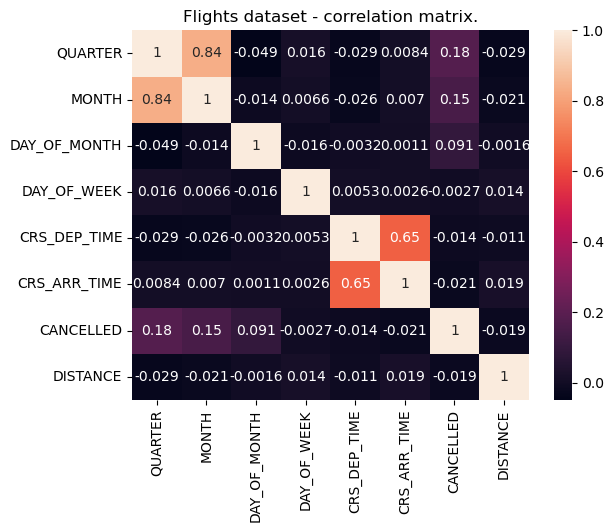

In [62]:
sns.heatmap(df.corr(), annot=True);
plt.title("Flights dataset - correlation matrix.");

#### Encode of nominal values to numerical.

Encode of variables have been performed in order to successfully run machine learning models.

In [63]:
dummy_df = pd.get_dummies(df, columns=[ "ORIGIN_CITY_NAME", "ORIGIN_STATE_NM", "DEST_CITY_NAME","DEST_STATE_ABR", "DEST_STATE_NM"], 
                         prefix=[ "ORIGIN_CITY_NAME", "ORIGIN_STATE_NM", "DEST_CITY_NAME","DEST_STATE_ABR", "DEST_STATE_NM"],
                         drop_first=True)

In [64]:
dummy_df.head(3)

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,CANCELLED,DISTANCE,ORIGIN_CITY_NAME_Austin,ORIGIN_CITY_NAME_Baltimore,...,DEST_STATE_NM_North Carolina,DEST_STATE_NM_Ohio,DEST_STATE_NM_Oregon,DEST_STATE_NM_Pennsylvania,DEST_STATE_NM_Tennessee,DEST_STATE_NM_Texas,DEST_STATE_NM_Utah,DEST_STATE_NM_Virginia,DEST_STATE_NM_Washington,DEST_STATE_NM_Wisconsin
0,1,1,1,3,1300,1450,0,545,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,3,700,915,0,883,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,3,1750,2010,0,883,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.shape

(1561235, 13)

In [66]:
dummy_df.shape

(1561235, 187)

#### Double-check if all values are numeric.

As  dimensionality of the dataset has been increased, it needs to be sliced otherwise *info()* won’t work.

In [67]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1561235 entries, 0 to 1562031
Columns: 187 entries, QUARTER to DEST_STATE_NM_Wisconsin
dtypes: int64(8), uint8(179)
memory usage: 373.7 MB


In [68]:
dummy_df.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1561235 entries, 0 to 1562031
Data columns (total 100 columns):
 #   Column                                       Non-Null Count    Dtype
---  ------                                       --------------    -----
 0   QUARTER                                      1561235 non-null  int64
 1   MONTH                                        1561235 non-null  int64
 2   DAY_OF_MONTH                                 1561235 non-null  int64
 3   DAY_OF_WEEK                                  1561235 non-null  int64
 4   CRS_DEP_TIME                                 1561235 non-null  int64
 5   CRS_ARR_TIME                                 1561235 non-null  int64
 6   CANCELLED                                    1561235 non-null  int64
 7   DISTANCE                                     1561235 non-null  int64
 8   ORIGIN_CITY_NAME_Austin                      1561235 non-null  uint8
 9   ORIGIN_CITY_NAME_Baltimore                   1561235 non-null  uint

In [69]:
dummy_df.iloc[:,100:200].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1561235 entries, 0 to 1562031
Data columns (total 87 columns):
 #   Column                         Non-Null Count    Dtype
---  ------                         --------------    -----
 0   DEST_CITY_NAME_Houston         1561235 non-null  uint8
 1   DEST_CITY_NAME_Indianapolis    1561235 non-null  uint8
 2   DEST_CITY_NAME_Jacksonville    1561235 non-null  uint8
 3   DEST_CITY_NAME_Kansas City     1561235 non-null  uint8
 4   DEST_CITY_NAME_Las Vegas       1561235 non-null  uint8
 5   DEST_CITY_NAME_Los Angeles     1561235 non-null  uint8
 6   DEST_CITY_NAME_Miami           1561235 non-null  uint8
 7   DEST_CITY_NAME_Milwaukee       1561235 non-null  uint8
 8   DEST_CITY_NAME_Minneapolis     1561235 non-null  uint8
 9   DEST_CITY_NAME_Nashville       1561235 non-null  uint8
 10  DEST_CITY_NAME_New Orleans     1561235 non-null  uint8
 11  DEST_CITY_NAME_New York        1561235 non-null  uint8
 12  DEST_CITY_NAME_Newark          1561235 non

In [70]:
dummy_df.iloc[:,200:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1561235 entries, 0 to 1562031
Empty DataFrame

In [71]:
dummy_df.isnull().sum().sort_values(ascending=False)

QUARTER                          0
DEST_CITY_NAME_St. Louis         0
DEST_CITY_NAME_Raleigh/Durham    0
DEST_CITY_NAME_Sacramento        0
DEST_CITY_NAME_Salt Lake City    0
                                ..
ORIGIN_STATE_NM_Louisiana        0
ORIGIN_STATE_NM_Maine            0
ORIGIN_STATE_NM_Maryland         0
ORIGIN_STATE_NM_Massachusetts    0
DEST_STATE_NM_Wisconsin          0
Length: 187, dtype: int64

## Model precision check before further model tuning 

Four models have been chosen to estimate the highest accuracy scores before further model tuning and deployment:

* Logical Regression
* Linear Discrimination Analysis
* Decision tree classifier
* Gaussian Naive Bayes

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##### **(CTM)** model check may take up to 20min before fully completed.

##### 10% / 90% split

In [ ]:
X = dummy_df.drop(columns="CANCELLED") # removing target variable
y = dummy_df["CANCELLED"] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [93]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [94]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.896167 (0.000003)
LDA: 0.896131 (0.000011)
CART: 0.908240 (0.000834)
NB: 0.641595 (0.003052)


In [ ]:
# Test-split 10% / 90% outcome

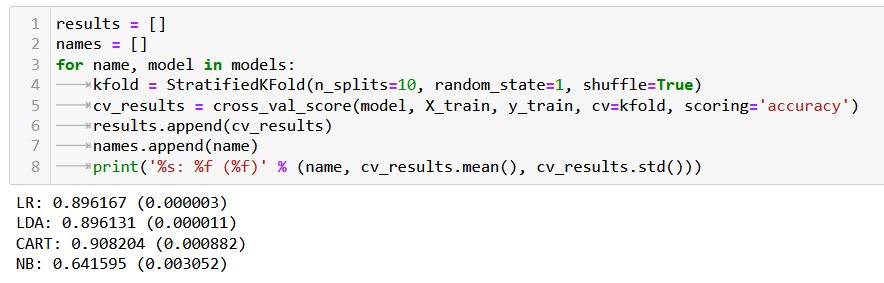

#### **(CTM)** Train-test split other outcomes

##### 20% / 80% split

In [ ]:
X = dummy_df.drop(columns="CANCELLED") # removing target variable
y = dummy_df["CANCELLED"] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

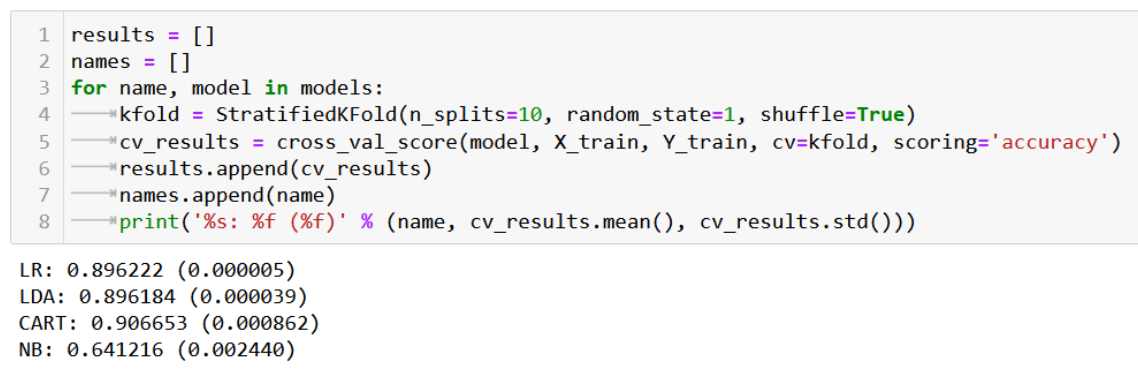

#### 25% / 75% split

In [ ]:
X = dummy_df.drop(columns="CANCELLED") # removing target variable
y = dummy_df["CANCELLED"] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

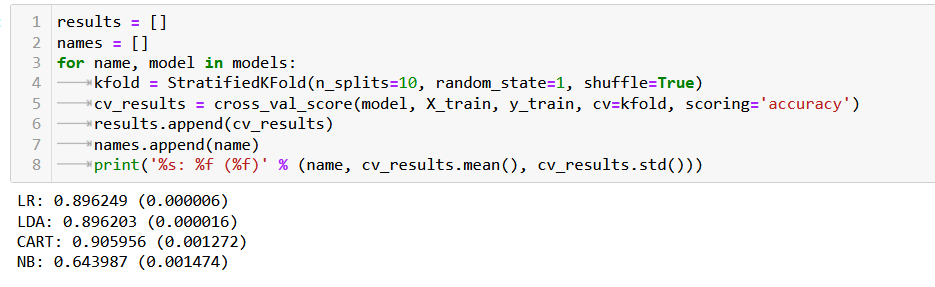

##### 30% / 70% split

In [ ]:
X = dummy_df.drop(columns="CANCELLED") # removing target variable
y = dummy_df["CANCELLED"] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

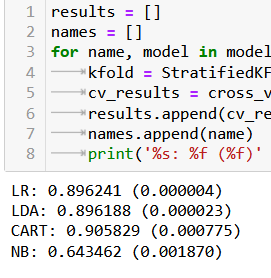

##### Various test-split outcomes summary.

Four different test-split variations have been performed. The outcomes were similar, and the accuracy difference was minor between different test splits, therefore any setup can be used.

---

### Feature scaling

The purpose of data scaling is a transformation of numeric features with different magnitudes to make sure that all features contribute equally, avoiding the domination of features with higher values. Also, feature scaling can improve the performance of machine learning models (Bhandari, 2023). 

##### Standard scaler

Standardization transforming features around the mean value and standard deviation equal to 1 (Bhandari, 2023).

In [97]:
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preproc

In [100]:
from sklearn.model_selection import train_test_split
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]


---

#### (CTM) - Models accuracy basic check with using the standard scaler.

In [101]:
X.loc[:,["QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","CRS_DEP_TIME","CRS_ARR_TIME","DISTANCE"]] = preproc.StandardScaler().fit_transform(X.loc[:,["QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","CRS_DEP_TIME","CRS_ARR_TIME","DISTANCE"]])

In [102]:
X

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,ORIGIN_CITY_NAME_Austin,ORIGIN_CITY_NAME_Baltimore,ORIGIN_CITY_NAME_Boston,...,DEST_STATE_NM_North Carolina,DEST_STATE_NM_Ohio,DEST_STATE_NM_Oregon,DEST_STATE_NM_Pennsylvania,DEST_STATE_NM_Tennessee,DEST_STATE_NM_Texas,DEST_STATE_NM_Utah,DEST_STATE_NM_Virginia,DEST_STATE_NM_Washington,DEST_STATE_NM_Wisconsin
0,-0.611155,-1.179766,-1.643294,-0.476130,-0.051092,-0.095097,-0.603148,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.611155,-1.179766,-1.643294,-0.476130,-1.292550,-1.131409,-0.020685,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.611155,-1.179766,-1.643294,-0.476130,0.880001,0.989639,-0.020685,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.611155,-1.179766,-1.643294,-0.476130,-0.464911,-0.346911,-0.020685,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.611155,-1.179766,-1.643294,-0.476130,1.190365,1.183342,-0.134420,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562027,1.636246,2.100124,-0.280696,1.030007,0.662746,0.470515,-1.320026,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1562028,1.636246,2.100124,-0.280696,1.030007,0.424800,0.633226,0.365327,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1562029,1.636246,2.100124,-0.280696,1.030007,-0.464911,-0.182264,0.365327,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1562030,1.636246,2.100124,-0.280696,1.030007,0.383418,0.495697,0.143025,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
# minor impact after data standarization. in fact LR and CART slightly decresed with their precision score

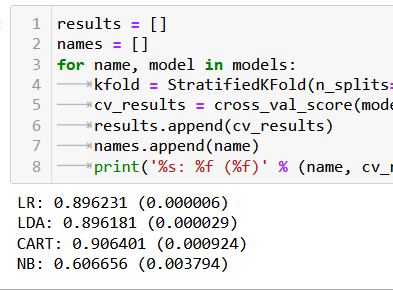

---

#### Minmax scaller

minmax scaler transforms numerical values to the fixed range between 0 and 1.

In [ ]:
from sklearn.model_selection import train_test_split
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]


In [109]:
X.loc[:,["QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","CRS_DEP_TIME","CRS_ARR_TIME","DISTANCE"]] = preproc.minmax_scale(X.loc[:,["QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","CRS_DEP_TIME","CRS_ARR_TIME","DISTANCE"]])

In [110]:
X.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,ORIGIN_CITY_NAME_Austin,ORIGIN_CITY_NAME_Baltimore,ORIGIN_CITY_NAME_Boston,...,DEST_STATE_NM_North Carolina,DEST_STATE_NM_Ohio,DEST_STATE_NM_Oregon,DEST_STATE_NM_Pennsylvania,DEST_STATE_NM_Tennessee,DEST_STATE_NM_Texas,DEST_STATE_NM_Utah,DEST_STATE_NM_Virginia,DEST_STATE_NM_Washington,DEST_STATE_NM_Wisconsin
0,0.083041,0.026750,0.007595,0.055970,0.643705,0.876150,0.255320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.135510,0.043672,0.012395,0.081147,0.482798,0.770228,0.604267,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.045717,0.014713,0.004181,0.038060,0.624143,0.874816,0.301674,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.089285,0.028764,0.008167,0.058966,0.570115,0.834903,0.448494,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.040933,0.013170,0.003744,0.035765,0.643928,0.872634,0.262548,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.head()

##### (CTM)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

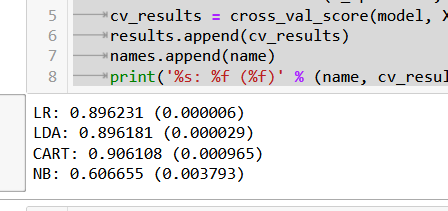

#####  normalization

Normalization transforms numerical values to the mean 0 and standard deviation 1

In [103]:
from sklearn.model_selection import train_test_split
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]


In [107]:
X.loc[:,["QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","CRS_DEP_TIME","CRS_ARR_TIME","DISTANCE"]] = preproc.normalize(X.loc[:,["QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","CRS_DEP_TIME","CRS_ARR_TIME","DISTANCE"]])

In [108]:
X.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,ORIGIN_CITY_NAME_Austin,ORIGIN_CITY_NAME_Baltimore,ORIGIN_CITY_NAME_Boston,...,DEST_STATE_NM_North Carolina,DEST_STATE_NM_Ohio,DEST_STATE_NM_Oregon,DEST_STATE_NM_Pennsylvania,DEST_STATE_NM_Tennessee,DEST_STATE_NM_Texas,DEST_STATE_NM_Utah,DEST_STATE_NM_Virginia,DEST_STATE_NM_Washington,DEST_STATE_NM_Wisconsin
0,0.000494,0.000494,0.000494,0.001483,0.642845,0.717019,0.269500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000689,0.000689,0.000689,0.002067,0.482251,0.630371,0.608326,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000356,0.000356,0.000356,0.001069,0.623321,0.715928,0.314510,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000518,0.000518,0.000518,0.001553,0.569398,0.683278,0.457071,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000338,0.000338,0.000338,0.001015,0.643067,0.714143,0.276519,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

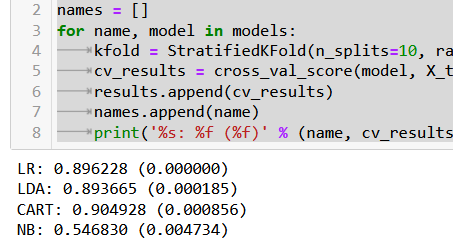

### Principal component analysis - dimensionality reduction.

Due to the enlargement of the dataset to 186 columns after encoding, the dimensionality of the data will be reduced to the minimum number of features that will represent 99.5% of the variance of the original dataset.

In [77]:
from sklearn.decomposition import PCA

In [143]:
from sklearn.model_selection import train_test_split
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]


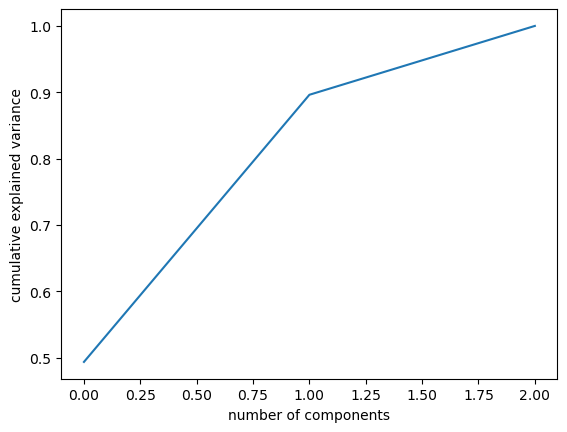

In [144]:
pca = PCA(n_components=0.995).fit(X) # to keep 99.5% of the variance, the n_component parameter has been set to 0.995
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [145]:
# n_components provide a number of features of previously defined PCA and variance value.
pca.n_components_

3

In [146]:
pca = PCA(3)

In [147]:
projected = pca.fit_transform(X) # transformation of the original dataset to reduced number of components representing 99.5% of the variance

In [148]:
projected

array([[  63.22786389, -348.55063072,    6.05840062],
       [ 852.14345364,   14.74954798,  -72.00668026],
       [-663.59309351,  -30.81270594,  -27.37720291],
       ...,
       [ 214.09298214,  220.83601523,  -98.38220087],
       [-316.42608846,   74.55746096,  -32.10190736],
       [-820.36104769, 1768.69002406, -387.45297808]])

In [149]:
projected.shape

(1561235, 3)

In [150]:
# proportion of data variance per component - numerical and graphical (bar plot)

In [151]:
pca.explained_variance_

array([413206.72897612, 336824.67677839,  86810.36933084])

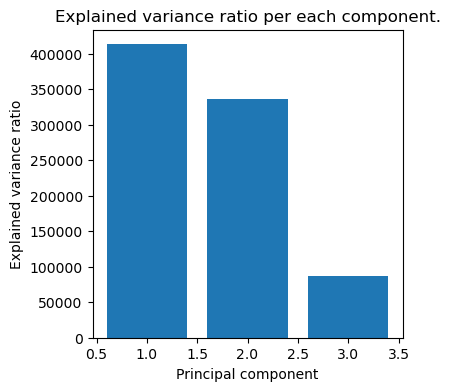

In [152]:
plt.figure(figsize=(4,4));
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_);
plt.title("Explained variance ratio per each component.");
plt.ylabel("Explained variance ratio");
plt.xlabel("Principal component");

In [153]:
# Array components are transformed to dataframe with renaming each component column as C1, C2, C3

df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3'])

In [154]:
df_pca.head()

,C1,C2,C3
0,63.227864,-348.550631,6.058401
1,852.143454,14.749548,-72.006680
2,-663.593094,-30.812706,-27.377203
3,283.729979,-2.541996,-46.864637
4,-836.321999,-102.969093,15.216029


In [155]:
df_array = df_pca.values

In [156]:
X = df_array

In [157]:
y = y

##### PCA + model accuracy check

Once the dimensionality of the dataset has been reduced., model accuracy estimation has been run to double-check accuracy scoring.

It is worth highlighting that Gaussian Naive Bayes model accuracy increased once dataset dimensionality was reduced.
Time required for the models to make predictions has been reduced as well.

In [158]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

##### (CTM)

In [159]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [161]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.896228 (0.000000)
LDA: 0.896228 (0.000000)
CART: 0.894937 (0.000843)
NB: 0.896228 (0.000000)


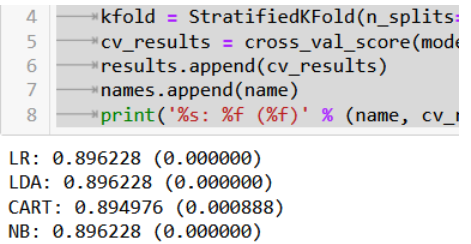

----

## Classification report and confusion matrix

The classification outcomes will be explained and compared based on the confusion matrix and classification reports (Kohli, 2019).

* **Precision**: what percent of predictions were correct – “defined as a ratio of true positives to the sum of a truly positive and false positive”.
* **Recall**:  correctly identified positive fractions.
* **F1 Score** – calculated as : F1 Score = 2*(Recall * Precision) / (Recall + Precision). F1 uses harmonic weighted scores where 1.0 is the best and 0.0 is the worst outcome. The F1 score Is also used to compare classifier models.
* **Support** - The number of the class item.


Target variable (CANCELLED): 0 - flight not cancelled, 1 - flight cancelled

#### PCA:  CART / Decision Tree Classifier Test 1: default parameters

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dtc = DecisionTreeClassifier(random_state=1)


In [164]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [165]:
predictions = dtc.predict(X_validation)

In [166]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
print(accuracy_score(Y_validation, predictions))

0.896428148228806


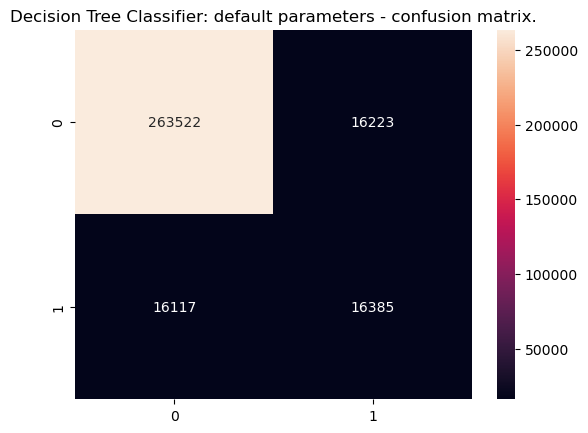

In [175]:
cm = confusion_matrix(round(Y_validation), predictions);
sns.heatmap(cm, annot = True, fmt='d');
plt.title("Decision Tree Classifier: default parameters - confusion matrix.");

In [168]:
print(classification_report(Y_validation, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9424    0.9420    0.9422    279745
           1     0.5025    0.5041    0.5033     32502

    accuracy                         0.8964    312247
   macro avg     0.7224    0.7231    0.7227    312247
weighted avg     0.8966    0.8964    0.8965    312247



In [169]:
print(f"Training Accuracy: {dtc.score(X_train,Y_train)*100}%")
print(f"Model Accuracy: {dtc.score(X_validation,Y_validation)*100}%")

Training Accuracy: 99.98494781375001%
Model Accuracy: 89.6428148228806%


##### Test 1 outcomes

Target carriable (cancellations) classification using decision tree classifier outcomes, suggests that the model accuracy score reached 89,64% and a Training accuracy score of 99.98%. The confusion matrix suggests that 263522 class **0** variables were correctly classified and 16223 were incorrectly classified. The class **1**,16385 variables were correctly classified and 16117 were incorrectly classified.

The classification report suggests that the precision of the class **0** is 94.24% correctly classified and class **1** is correctly classified 50.25% of the time.

---

#### Decision Tree Classifier - Grid Search Cross Validation

Grid search is a technique used for the exploration of optimal parameters of the model using a prespecified set of parameters (Great Learning Team, 2023).

Parameters can be explored by using Shift+Tab inside the model bracket

##### (CTM)

In [177]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [178]:
hyper_params = [ {'max_depth': [None,1,2,3,4,5], # Max depth of decision tree. It can increase complexity of the relationships
                    'max_leaf_nodes': [None,1,2,3,4,5], # max leaf nodes specifies the sze of the tree
                    'min_samples_leaf': [1,2]}] # it can help with smoothing the model

In [179]:
model = DecisionTreeClassifier(random_state = 1) # default params:  max_depth=None, Max_leaf_nodes = None, min_samples_leaf=1

In [180]:
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)

In [182]:
model_cv.fit(X_train, Y_train)  

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.8s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.8s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.2s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.1s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.7s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.2s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.6s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.6s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.3s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.6s
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2; total time=   9.1s
[C

[CV] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2; total time=   1.3s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.2s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.4s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.5s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.5s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.5s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.5s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.5s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.5s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.6s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.6s
[CV] END max_depth=None, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.4s
[CV] END max_dep

[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.4s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=1; total time=   0.5s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.4s
[CV] END ..max_depth=1, max_leaf_nodes=4, min_samples_leaf=2; total time=   0.5s
[CV] END ..max_depth=1, max_

[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.9s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=2; total time=   1.0s
[CV] END ..max_depth=2, max_leaf_nodes=3, min_samples_leaf=2; total time=   0.9s
[CV] END ..max_depth=2, max_

[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=1; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.8s
[CV] END ..max_depth=3, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.8s
[CV] END ..max_depth=3, max_

[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=1; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV] END ..max_depth=4, max_leaf_nodes=1, min_samples_leaf=2; total time=   0.0s
[CV] END ..max_depth=4, max_

[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1; total time=   2.0s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=1; total time=   2.1s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.0s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.2s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.4s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.3s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.1s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.0s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.0s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.0s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.0s
[CV] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=2; total time=   2.1s
[CV] END ..max_d

[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=1; total time=   1.6s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.5s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.6s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.7s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.6s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.6s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.5s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.6s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.4s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.4s
[CV] END ..max_depth=5, max_leaf_nodes=5, min_samples_leaf=2; total time=   1.6s


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid=[{'max_depth': [None, 1, 2, 3, 4, 5],
                          'max_leaf_nodes': [None, 1, 2, 3, 4, 5],
                          'min_samples_leaf': [1, 2]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [183]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

In [184]:
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9030062729860093 corresponding to hyperparameters {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2}


In [ ]:
# Cross Validation outcome

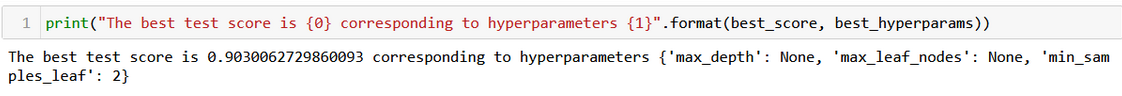

---

#### Decision Tree Classifier + GridSearchCV outcome

Based on the cross validation outcomes of the chosen parameters the model will be ran again and compared with default parameters outcome.

In [185]:
dtc = DecisionTreeClassifier(max_depth = None,max_leaf_nodes=None,min_samples_leaf= 2, random_state=1 )

In [186]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=1)

In [187]:
predictions = dtc.predict(X_validation)

In [188]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9042777032285338
[[268379  11366]
 [ 18523  13979]]


In [189]:
print(classification_report(Y_validation, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9354    0.9594    0.9473    279745
           1     0.5515    0.4301    0.4833     32502

    accuracy                         0.9043    312247
   macro avg     0.7435    0.6947    0.7153    312247
weighted avg     0.8955    0.9043    0.8990    312247



In [190]:
print(f"Training Accuracy: {dtc.score(X_train,Y_train)*100}%")
print(f"Model Accuracy: {dtc.score(X_validation,Y_validation)*100}%")

Training Accuracy: 96.75601366866616%
Model Accuracy: 90.42777032285339%


#### Tuned model outcomes

Target variable (cancellations) classification, using decision tree classifier outcomes, suggests that the model accuracy score reached 90,43% and a Training accuracy score of 96.75%. Compared with default model parameters the training accuracy slightly decreased from 99.98% to 96.76% however model accuracy slightly increased from 89.64% to 90.43%.

The confusion matrix suggests that 268379 class **0** variables were correctly classified and 11366 were incorrectly classified. The class **1**,13979 variables were correctly classified and 18523 were incorrectly classified. Compared with default model parameters, class **0** correctly classified number increased however in class **1** correctly classified classes decreased.

The classification report suggests that the precision of the class **0** is 94.24% correctly classified, which also increased compared with default parameters, and class **1** is correctly classified 43.01% of the time, which decreased from 50.25%.

In [ ]:
# Tuned CART model outcomes

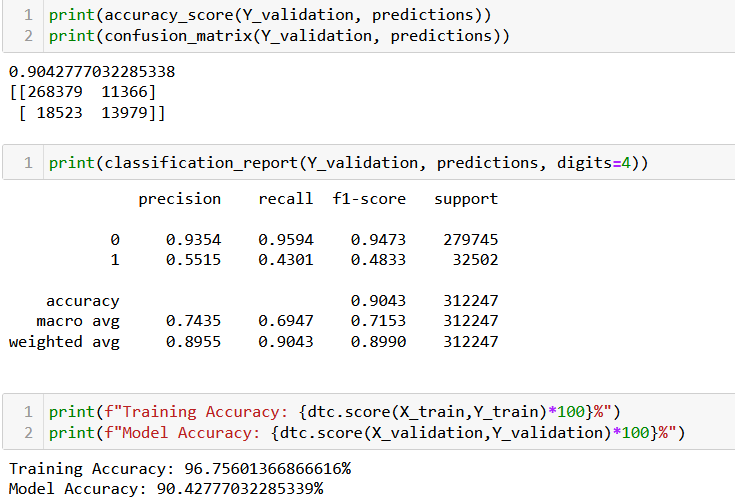

----

# SMOTE + CART model

SMOTE is an oversampling technique used to deal with imbalanced data distribution, creating artificial class instances for the class minority (geeksforgeeks.org team, 2023). Using this technique can improve with correct classification of minor class (class 1) which currently the precision varies from more or less 43% – to 50%.


A standard 20% / 80% test split of the data set will be implemented. Once completed *SMOTE()* will be used on *X_train* and *y_train* variables to oversample imbalanced training data. Once performed, PCA will be used to reduce the dimensionality of the oversampled dataset. Another step will be finding optimal parameters using GridSearch and running the model based on the optimal parameter outcomes.

In [ ]:
# SMOTE

In [76]:
from imblearn.over_sampling import SMOTE


In [194]:
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [196]:
smt = SMOTE()

In [197]:
X_train, y_train = smt.fit_resample(X_train, y_train) # after test/split the SMOTE is implemented on X an y train samples

In [198]:
pca = PCA(n_components=0.995).fit(X_train) 

In [199]:
pca.fit_transform(X_train)

array([[ 404.70308391, -395.18557554,  -53.54500087],
       [ 444.66185586, -216.51428599,   10.00677314],
       [ 576.52817827,  889.94120001, -313.70976752],
       ...,
       [-458.40766295,  134.78993277,    3.7292764 ],
       [-577.27988194,  346.65786132,  -65.29394735],
       [ 860.1827681 ,  513.21085495, -285.36056785]])

In [200]:
# SMOTE + PCA

In [201]:
pca = PCA(3)
projected = pca.fit_transform(X_train)

In [202]:
projected

array([[ 404.7030839 , -395.18557553,  -53.54500087],
       [ 444.66185586, -216.51428599,   10.00677314],
       [ 576.52817827,  889.94120001, -313.70976752],
       ...,
       [-458.40766295,  134.78993277,    3.7292764 ],
       [-577.27988194,  346.65786132,  -65.29394735],
       [ 860.1827681 ,  513.21085495, -285.36056785]])

In [203]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3'])

In [204]:
df_pca.head()

,C1,C2,C3
0,404.703084,-395.185576,-53.545001
1,444.661856,-216.514286,10.006773
2,576.528178,889.941200,-313.709768
3,-851.251700,161.657912,-56.354233
4,-756.367444,924.754050,-30.978841


In [205]:
df_array = df_pca.values

In [206]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.5006348 , 0.39263822, 0.10661827])

##### WARNING (CTM) - GridSearch + SMOTE + PCA can take several hours to complete full search 3h - 4.5h

In [207]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [208]:
hyper_params = [ {'max_depth': [None,1,2,3,4],
                    'max_leaf_nodes': [None,1,2,3,4],
                    'min_samples_leaf': [1,2]}]

In [209]:
model = DecisionTreeClassifier(random_state = 1)

In [210]:
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)

In [211]:
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.7min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.7min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.7min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.7min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.7min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.7min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.6min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.7min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 1.7min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=1; total time= 2.1min
[CV] END max_depth=None, max_leaf_nodes=None, min_samples_leaf=2; total time= 1.8min
[C

[CV] END max_depth=None, max_leaf_nodes=4, min_samples_leaf=2; total time=  21.5s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.4s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.6s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.5s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.6s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.1s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.9s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.9s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   9.0s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.9s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1; total time=   8.6s
[CV] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2; total time=   8.9s
[CV] END max_dep

[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  14.8s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  14.3s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  14.8s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  14.8s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  14.8s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  15.5s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  15.2s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  14.4s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  14.6s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=1; total time=  14.8s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=2; total time=  14.5s
[CV] END max_depth=2, max_leaf_nodes=None, min_samples_leaf=2; total time=  14.7s
[CV] END max_dep

[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  22.9s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  23.6s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  23.3s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  23.3s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  23.3s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  22.6s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  20.2s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  20.1s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1; total time=  20.3s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=2; total time=  19.3s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=2; total time=  19.7s
[CV] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=2; total time=  20.1s
[CV] END max_dep

[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=1; total time=  24.6s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=1; total time=  24.9s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=1; total time=  25.6s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=1; total time=  24.2s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=1; total time=  23.9s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=1; total time=  24.6s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=1; total time=  24.7s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=1; total time=  24.6s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=2; total time=  25.4s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=2; total time=  25.7s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=2; total time=  25.9s
[CV] END max_depth=4, max_leaf_nodes=None, min_samples_leaf=2; total time=  25.6s
[CV] END max_dep

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid=[{'max_depth': [None, 1, 2, 3, 4],
                          'max_leaf_nodes': [None, 1, 2, 3, 4],
                          'min_samples_leaf': [1, 2]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [212]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

In [213]:
print("The best test score including SMOTE is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score including SMOTE is 0.9331361942997756 corresponding to hyperparameters {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1}


In [ ]:
### GridSearch + SMOTE + PCA Outcome

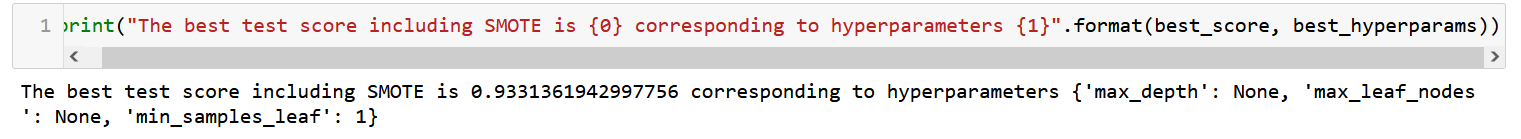

---

##### CART + PCA + SMOTE - default params (for comparison)

In [258]:
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [260]:
smt = SMOTE()

In [261]:
X_train, y_train = smt.fit_resample(X_train, y_train) # after test/split the SMOTE is implemented on X an y train samples

In [262]:
pca = PCA(n_components=0.995).fit(X_train) 

In [263]:
pca.fit_transform(X_train)

array([[ 405.26754697, -393.78913427,  -53.89632584],
       [ 444.82263099, -215.08461115,    9.81440754],
       [ 574.20993597,  891.95009941, -312.9207595 ],
       ...,
       [ 777.47093857,  548.96748844,  -85.97884864],
       [-418.2794079 ,   64.4412974 ,  -93.23909241],
       [ 571.79721961, -445.35058992,  -49.11742909]])

In [264]:
pca.n_components_

3

In [265]:
pca = PCA(3)
projected = pca.fit_transform(X_train)

In [266]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3'])

In [267]:
df_array = df_pca.values

In [268]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.5008651 , 0.39220402, 0.10682215])

In [269]:
dtc = DecisionTreeClassifier(random_state=1 )
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)

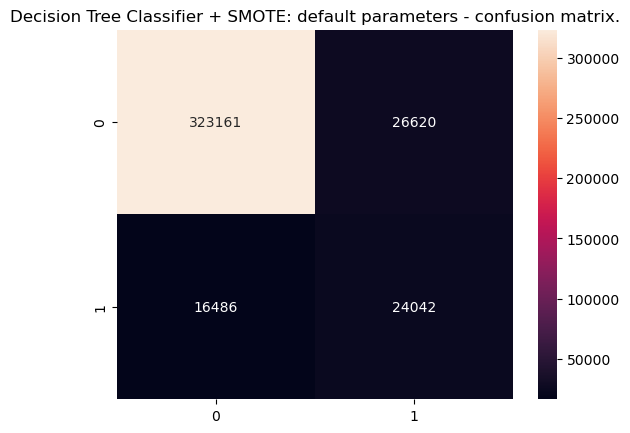

In [270]:
cm = confusion_matrix(round(y_test), predictions);
sns.heatmap(cm, annot = True, fmt='d');
plt.title("Decision Tree Classifier + SMOTE: default parameters - confusion matrix.");

In [271]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8895592978896207
[[323161  26620]
 [ 16486  24042]]


In [272]:
print(classification_report(y_test, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9515    0.9239    0.9375    349781
           1     0.4746    0.5932    0.5273     40528

    accuracy                         0.8896    390309
   macro avg     0.7130    0.7586    0.7324    390309
weighted avg     0.9019    0.8896    0.8949    390309



In [273]:
print(f"Training Accuracy: {dtc.score(X_train,y_train)*100}%")
print(f"Model Accuracy: {dtc.score(X_test,y_test)*100}%")

Training Accuracy: 99.56039117847185%
Model Accuracy: 88.95592978896207%


##### CART + PCA + SMOTE() - tuned model based on GridSearchCV outcomes

In [239]:
dtc2 = DecisionTreeClassifier(max_depth = None,max_leaf_nodes=None,min_samples_leaf= 1, random_state=1)
dtc2.fit(X_train, y_train)
predictions = dtc2.predict(X_test)

In [ ]:
cm = confusion_matrix(round(y_test), predictions);
sns.heatmap(cm, annot = True, fmt='d');
plt.title("Decision Tree Classifier + SMOTE: default parameters - confusion matrix.");

In [240]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8900845227755445
[[323338  26443]
 [ 16458  24070]]


In [ ]:
cm = confusion_matrix(round(y_test), predictions);
sns.heatmap(cm, annot = True, fmt='d');
plt.title("Decision Tree Classifier + SMOTE: CV tuned parameters - confusion matrix.");

In [242]:
print(classification_report(y_test, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9516    0.9244    0.9378    349781
           1     0.4765    0.5939    0.5288     40528

    accuracy                         0.8901    390309
   macro avg     0.7140    0.7592    0.7333    390309
weighted avg     0.9022    0.8901    0.8953    390309



In [243]:
print(f"Training Accuracy: {dtc2.score(X_train,y_train)*100}%")
print(f"Model Accuracy: {dtc2.score(X_test,y_test)*100}%")

Training Accuracy: 99.55610277678774%
Model Accuracy: 89.00845227755445%


#### Decision tree classifier default parameters vs tuned parameters: outcome summary


Two decision tree classifier models were run using different parameters. Both models ran on reduced dimensionality and oversampled data using SMOTE.

The model with default parameters reached a training accuracy score equal to 99.56% with a model accuracy of 88.96%. Decision tree where *max_depth* and *max_leaf* parameters were set to *None*, and *min_samples_leaf = 1*, the training accuracy is the same as with default parameters – 99.56%, however, model accuracy slightly improved reaching 89.01%.

The confusion matrix suggests that the decision tree with default parameters classified class*0* 323161 correctly and 26620 incorrectly. Class *1* was classified as 24042 correctly and 16486 incorrectly.In comparison the model with tuned parameters classified the class *0* correctly 323161 and 26443 incorrectly, whereas class *1* was classified correctly 24070 and 16458 incorrectly, therefore tuned model slightly improved the classification. 

F-score, which is a harmonic weighted score of the recall (sensitivity) and precision, confirms that the tuned model performed slightly better than with default parameters, reaching a class 0 score equal to 93.78 and class 1 equal to 52.88, where the model with default parameters reached class *0* score 93.75 and class*1* score equal to 52.73.


---

---

## Logistic regression 

##### Logistic regression: default parameters - GridSearch for optimal parameters + PCA 99.5% variance

In [78]:
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]

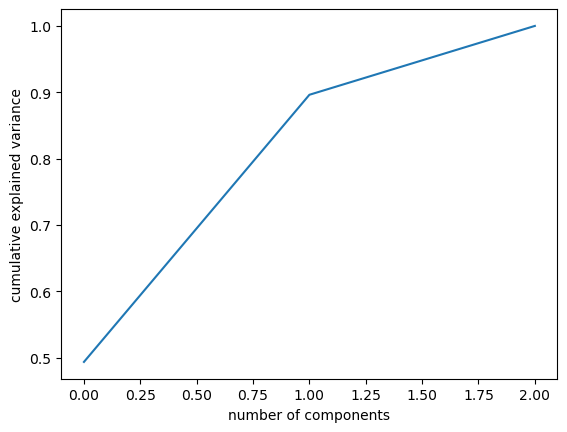

In [79]:
pca = PCA(n_components=0.995).fit(X) # to keep 99.5% of the variance, the n_component parameter has been set to 0.995
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [80]:
pca.n_components_ # number of components required for keeping 99.5 variance of the original dataset

3

In [81]:
pca = PCA(3)

In [82]:
projected = pca.fit_transform(X)

In [83]:
pca.explained_variance_ # variance kept (eigenvectors) per component

array([413206.72897612, 336824.67677838,  86810.36933084])

In [84]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3'])

In [85]:
df_array = df_pca.values

In [86]:
X = df_array

##### Gridsearch for Logistic Regression optimal parameters

In [87]:
# Train test split 20%/80%

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

##### (CTM) - Gridsearch may take up to 45min

In [299]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1) # n_splits: number of splitting iterations in the cross-validator

In [300]:
hyper_params = [ {'C': [0.001,0.01,0.05,1], # regularization strength - smaller C value then stronger reqularization
                 'penalty': ["l1", "l2", "elasticnet"], # regularization/ penality type
                 'solver': ["liblinear","sag","saga"],# used for optimalization problem sag/saga better for large dataset
                 }]

In [301]:
model = LogisticRegression(random_state=1)

In [302]:
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)

In [303]:
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=  38.0s
[CV] END ...................C=0.001, penalty=l1

[CV] END ....................C=0.05, penalty=l1, solver=saga; total time=  35.4s
[CV] END ....................C=0.05, penalty=l1, solver=saga; total time=  34.6s
[CV] END ....................C=0.05, penalty=l1, solver=saga; total time=  34.9s
[CV] END ....................C=0.05, penalty=l1, solver=saga; total time=  34.7s
[CV] END ...............C=0.05, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ...............C=0.05, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ...............C=0.05, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ...............C=0.05, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ...............C=0.05, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END .....................C=0.05, penalty=l2, solver=sag; total time=  33.1s
[CV] END .....................C=0.05, penalty=l2, solver=sag; total time=  33.5s
[CV] END .....................C=0.05, penalty=l2, solver=sag; total time=  33.4s
[CV] END ...................

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(random_state=1),
             param_grid=[{'C': [0.001, 0.01, 0.05, 1],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['liblinear', 'sag', 'saga']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [304]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

In [305]:
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8962470728897722 corresponding to hyperparameters {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# gridsearch outcome

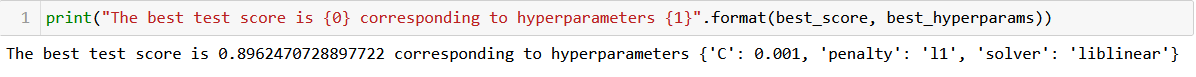

---

##### Logistic regression - default params

In [89]:
LR = LogisticRegression(random_state=1,multi_class="ovr", solver= 'liblinear' )
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

In [90]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8959158000456049
[[349684      0]
 [ 40625      0]]


In [91]:
print(classification_report(y_test, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8959    1.0000    0.9451    349684
           1     0.0000    0.0000    0.0000     40625

    accuracy                         0.8959    390309
   macro avg     0.4480    0.5000    0.4726    390309
weighted avg     0.8027    0.8959    0.8467    390309



In [92]:
print(f"Training Accuracy: {LR.score(X_train,y_train)*100}%")
print(f"Model Accuracy: {LR.score(X_test,y_test)*100}%")

Training Accuracy: 89.62470728295384%
Model Accuracy: 89.59158000456048%


##### Logistic regression - tuned params

In [113]:
LR = LogisticRegression(random_state=1, solver= 'liblinear', C=0.001, penalty="l1", multi_class="ovr")
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

In [114]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.72348831310577
[[260026  89755]
 [ 18170  22358]]


In [115]:
print(classification_report(y_test, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9347    0.7434    0.8281    349781
           1     0.1994    0.5517    0.2929     40528

    accuracy                         0.7235    390309
   macro avg     0.5671    0.6475    0.5605    390309
weighted avg     0.8583    0.7235    0.7726    390309



In [116]:
print(f"Training Accuracy: {LR.score(X_train,y_train)*100}%")
print(f"Model Accuracy: {LR.score(X_test,y_test)*100}%")

Training Accuracy: 71.57237583171168%
Model Accuracy: 72.348831310577%


##### Logistic regression C=1.0, penality="l2" vs C=0.001, penality="l1" outcome summary

Two logistic regression models were run using different parameters. Both models ran on reduced dimensionality. The model with parameters multi_class=”ovr” and solver = “liblinear” reached a training accuracy of 89.62% and a validation accuracy of 89.59%. Based on the confusion matrix, the logistic regression model with parameters specified above, classified class*0* 349684 correctly and 0 incorrectly class*1* was classified 40625 instances incorrectly with 0 instances correctly, therefore this model would not be recommended to use.

The model with parameters the same as above and additionally tuned where a penalty has been changed to “L1” and regularisation strength / C = 0.001 - improved. Training accuracy reached 71.57%, and model accuracy reached 72.35%, which is interesting. Phenomenon. This could happen due to the implementation of good regularization or models’ ability to perform well with new/unseen data (https://wp.wwu.eduwwu.edu Team, 2017).

The confusion matrix suggests that the model classified class *0* 260026 correctly and 22358 classes incorrectly. Class *1* was classified as 22358 correctly and 18170 incorrectly.

In comparison between two model variations, the F1-score of the first model reached a class*0* score equal to 94.51 and class *1* 0.0. The model with tuned penalty and regularization score reached F-1 score equal to 88.81 for class*0* and 29.29 for class *1*.


---

##### logistic regressiong (tuned ) + SMOTE + PCA

In [184]:
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y )

In [186]:
smt = SMOTE()

In [187]:
X_train, y_train = smt.fit_resample(X_train, y_train)

In [188]:
pca = PCA(n_components=0.995).fit(X_train)

In [189]:
pca.n_components_

3

In [190]:
pca = PCA(3)
projected = pca.fit_transform(X_train)

In [191]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3'])

In [192]:
projected

array([[ 406.44702916, -392.9540986 ,  -53.55774083],
       [ 445.66304556, -214.15079521,   10.0853938 ],
       [ 572.97968138,  893.00049679, -313.07310628],
       ...,
       [-912.24071593, -333.40845879,   84.59180142],
       [-834.92490562, -698.03528874,   34.08080315],
       [-504.16049462, -626.15350896,   40.12731539]])

In [193]:
df_array = df_pca.values

In [194]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.50115862, 0.39210921, 0.10662337])

In [195]:
# 

In [196]:
LR = LogisticRegression(random_state=1, solver= 'liblinear', C=0.001, penalty="l1", multi_class="ovr")
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

In [197]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.7234729406700845
[[260028  89753]
 [ 18178  22350]]


In [198]:
print(classification_report(y_test, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9347    0.7434    0.8281    349781
           1     0.1994    0.5515    0.2929     40528

    accuracy                         0.7235    390309
   macro avg     0.5670    0.6474    0.5605    390309
weighted avg     0.8583    0.7235    0.7726    390309



In [199]:
print(f"Training Accuracy: {LR.score(X_train,y_train)*100}%")
print(f"Model Accuracy: {LR.score(X_test,y_test)*100}%")

Training Accuracy: 71.52539400881696%
Model Accuracy: 72.34729406700845%


#### Logistic regression tuned with SMOTE vs without SMOTE summary

The implementation of SMOTE had a minor impact on the training model. Based on the confusion matrix class *0* was classified correctly 260028 and 89753 incorrectly. Class *1* was classified correctly as 22350 and incorrectly  18178. In coparison, the model classified without the SMOTE class*0* 260139 instances correctly and 89642 incorrectly, and class *1* was classified 22344 correctly and 18184 incorrectly. 

The F1-score suggest that the model without SMOTE reached a score equal to 82.83 for class*0* and 29.30 for class *1*. F1-score where SMOTE was implemented class *0* reached a score of 82.81 and class *1* 29.29.

---

## Linear Discriminant Analysis + PCA

In [201]:
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]

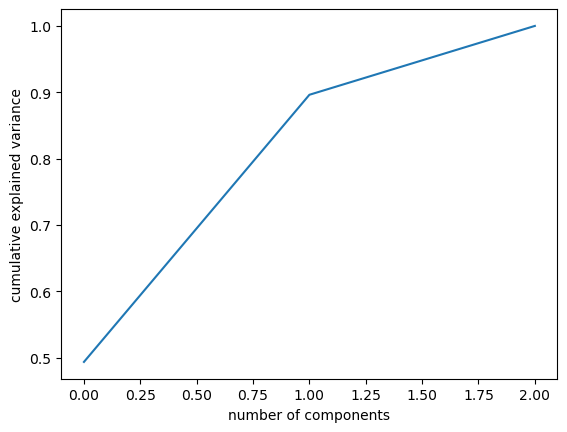

In [202]:
pca = PCA(n_components=0.995).fit(X) # to keep 99.5% of the variance, the n_component parameter has been set to 0.995
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [203]:
pca.n_components_

3

In [204]:
pca = PCA(3)

In [205]:
projected = pca.fit_transform(X) 

In [206]:
pca.explained_variance_

array([413206.72897612, 336824.67677839,  86810.36933084])

In [207]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3'])

In [208]:
df_array = df_pca.values

In [209]:
X = df_array

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [259]:
lda = LinearDiscriminantAnalysis()

In [260]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [261]:
perdiction = lda.predict(X_test)

In [262]:
print(accuracy_score(y_test, perdiction))
print(confusion_matrix(y_test, perdiction))

0.8958901793194622
[[349661     23]
 [ 40612     13]]


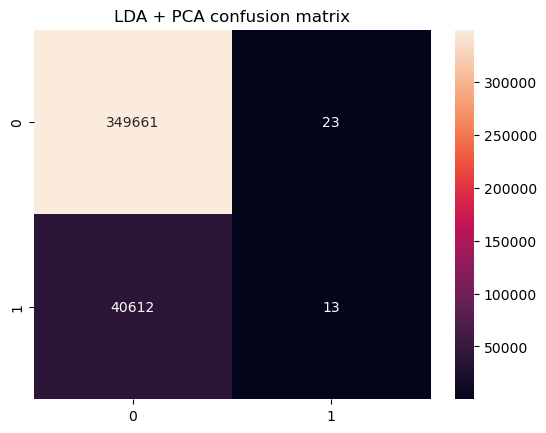

In [263]:
cm = confusion_matrix(round(y_test), perdiction);
sns.heatmap(cm, annot = True, fmt='d');
plt.title("LDA + PCA confusion matrix");

In [264]:
print(classification_report(y_test, perdiction, digits=4))

              precision    recall  f1-score   support

           0     0.8959    0.9999    0.9451    349684
           1     0.3611    0.0003    0.0006     40625

    accuracy                         0.8959    390309
   macro avg     0.6285    0.5001    0.4729    390309
weighted avg     0.8403    0.8959    0.8468    390309



---

##### (CTM) LDA gridsearch

In [277]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [278]:
hyper_params = [ {'solver': ["svd", "eigen"], # different solvers may have an impact depends of the data characteristic and dimension
                  'n_components': [None,3], # used for dimensionality reduction.as already reduced 2 params are used to test
                  'shrinkage': [None,"auto"]}] # regularization technique

In [279]:
model = LinearDiscriminantAnalysis()

In [280]:
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)

In [281]:
model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  22.6s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  22.5s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  22.7s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  23.2s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  24.7s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  23.9s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  23.5s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  25.5s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  22.6s
[CV] END ......n_components=None, shrinkage=None, solver=svd; total time=  22.8s
[CV] END ....n_components=None, shrinkage=None, solver=eigen; total time=  12.6s
[CV] END ....n_components=None, shrinkage=None, 

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=LinearDiscriminantAnalysis(),
             param_grid=[{'n_components': [None, 3],
                          'shrinkage': [None, 'auto'],
                          'solver': ['svd', 'eigen']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [282]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

In [283]:
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8962060799955639 corresponding to hyperparameters {'n_components': None, 'shrinkage': 'auto', 'solver': 'eigen'}


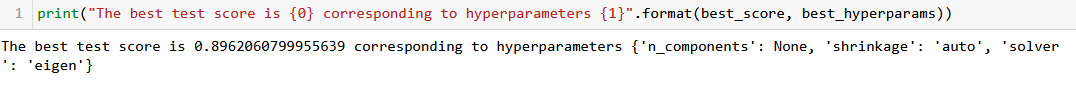

---

#### LDA tuned based on CV outcomes

In [287]:
lda = LinearDiscriminantAnalysis(n_components=None, shrinkage="auto", solver="eigen")

In [288]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

In [289]:
predictions = lda.predict(X_test)

In [290]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8958901793194622
[[349661     23]
 [ 40612     13]]


In [291]:
print(classification_report(y_test, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.8959    0.9999    0.9451    349684
           1     0.3611    0.0003    0.0006     40625

    accuracy                         0.8959    390309
   macro avg     0.6285    0.5001    0.4729    390309
weighted avg     0.8403    0.8959    0.8468    390309



In [292]:
print(f"Training Accuracy: {lda.score(X_train,y_train)*100}%")
print(f"Model Accuracy: {lda.score(X_test,y_test)*100}%")

Training Accuracy: 89.62086417075032%
Model Accuracy: 89.58901793194623%


#### LDA + PCA default parameters vs tuned

Two models have been run. One with default parameters, and another linear discriminate analysis model with tuned *shrinkage=auto*, and *solver=”eigen”*. It is worth highlighting that PCA was also implemented before making predictions. 

Either model with tuned or default parameters, did not perform well. Based on the confusion matrix both parameter variations classified class*0* 349661 correctly and only 23 incorrectly however class *1* was classified correctly only 13 instances and incorrectly 40612. Further improvement will be performed with SMOTE implementation.

#### LDA + SMOTE and PCA

In [293]:
X = dummy_df.drop(columns="CANCELLED")
y = dummy_df["CANCELLED"]

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [295]:
smt = SMOTE()

In [296]:
X_train, y_train = smt.fit_resample(X_train, y_train)

In [297]:
pca = PCA(n_components=0.995).fit(X_train)

In [298]:
pca.n_components_

3

In [299]:
pca = PCA(3)
projected = pca.fit_transform(X_train)

In [300]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3'])

In [301]:
df_array = df_pca.values

In [302]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.50063612, 0.39240475, 0.10685047])

In [303]:
lda = LinearDiscriminantAnalysis(n_components=None, shrinkage="auto", solver="eigen")

lda.fit(X_train, y_train)

predictions = lda.predict(X_test)

In [304]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.7396908603183632
[[269732  80049]
 [ 21552  18976]]


Text(0.5, 1.0, 'LDA + SMOTE + PCA confusion matrix')

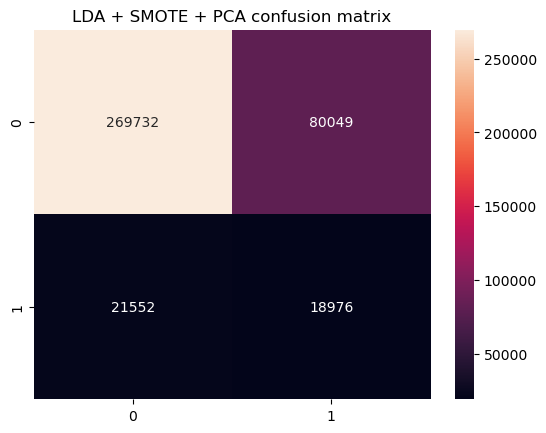

In [305]:
cm = confusion_matrix(round(y_test), predictions);
sns.heatmap(cm, annot = True, fmt='d');
plt.title("LDA + SMOTE + PCA confusion matrix");

In [306]:
print(classification_report(y_test, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9260    0.7711    0.8415    349781
           1     0.1916    0.4682    0.2720     40528

    accuracy                         0.7397    390309
   macro avg     0.5588    0.6197    0.5567    390309
weighted avg     0.8498    0.7397    0.7824    390309



In [307]:
print(f"Training Accuracy: {lda.score(X_train,y_train)*100}%")
print(f"Model Accuracy: {lda.score(X_test,y_test)*100}%")

Training Accuracy: 70.21285720003583%
Model Accuracy: 73.96908603183631%


#### LDA + SMOTE + PCA outcome

In comparison with the LDA model run before SMOTE implementation, the model has improved.
Based on Training accuracy, the model reached 70.21%, and model accuracy reached 73.97%. Similar to the CART model, it happens as it is possible to implement good regularization or models’ ability to perform well with new/unseen data (generalisation). Underfitting is less likely as the difference between train and test model accuracies is not that significant. 

Based on the confusion matrix the model correctly classified class *0* 269732 and incorrectly 80049. Class *1* was correctly classified 18976 instances and 21552 was incorrectly classified.
 The classification report suggests that the precision of class *0* is 92.60% correctly classified and class *1* is correctly classified only 19.16% of the time. 
 
F-score, which is a harmonic weighted score of the recall (sensitivity) and precision, confirms that the tuned model performed slightly better than with default parameters, reaching a class 0 score equal to 93.78 and class 1 equal to 52.88, where the model with default parameters reached class *0* score 93.75 and class*1* score equal to 52.73.
F-score, which is a harmonic weighted score of the recall (sensitivity) and precision, suggests that class *0* trained relatively well reaching an 84.15 score however, class *1* suggesting that class 1 was poorly predicted to reach a score 27.20.


----

##### Bibliography


Bhandari, A., 2023. Feature Engineering: Scaling, Normalization, and Standardization (Updated 2023). [Online] 
Available at: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
[Accessed 24 11 2023].

geeksforgeeks.org team, 2023. ML | Handling Imbalanced Data with SMOTE and Near Miss Algorithm in Python. [Online] 
Available at: https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
[Accessed 24 11 2023].

Great Learning Team, 2023. Hyperparameter Tuning with GridSearchCV. [Online] 
Available at: https://www.mygreatlearning.com/blog/gridsearchcv/
[Accessed 24 11 2023].

https://wp.wwu.eduwwu.edu Team, 2017. Generalization and Overfitting. [Online] 
Available at: https://wp.wwu.edu/machinelearning/2017/01/22/generalization-and-overfitting/
[Accessed 25 11 2023].

Kohli, S., 2019. Understanding a Classification Report For Your Machine Learning Model. [Online] 
Available at: https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397
[Accessed 24 11 2023].

